# Exploratory Data Analysis (EDA) (Notebook 1_Week 3 Deliverable_Part2)

### Import libraries

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading clean Dataset

In [2]:
# Load the data
df = pd.read_csv('declarations-exterminations-punaises-de-lit-1.csv')

#### Verify Datatype and make modifications

In [3]:
print(df.dtypes)

NO_DECLARATION        int64
DATE_DECLARATION     object
DATE_PRIOR_INSP      object
EXT_FREQ            float64
DATE_FIRST_EXT       object
DATE_LAST_EXT        object
HOOD_NUM             object
HOOD_NAME            object
BORO_NAME            object
MTM8_X              float64
MTM8_Y              float64
LONGITUDE           float64
LATITUDE            float64
LONG_LAT             object
MTM_X_Y              object
DEC_MONTH             int64
DEC_ISSUE             int64
DATE_DIFF           float64
dtype: object


In [4]:
# Convert 'DATE_INSP_VISPRE', 'DATE_DEBUTTRAIT', and 'DATE_FINTRAIT'
df['DATE_PRIOR_INSP'] = pd.to_datetime(df['DATE_PRIOR_INSP'])
df['DATE_FIRST_EXT'] = pd.to_datetime(df['DATE_FIRST_EXT'])
df['DATE_LAST_EXT'] = pd.to_datetime(df['DATE_LAST_EXT'])
df['DATE_DECLARATION'] = pd.to_datetime(df['DATE_DECLARATION'])
print(df.dtypes)

NO_DECLARATION               int64
DATE_DECLARATION    datetime64[ns]
DATE_PRIOR_INSP     datetime64[ns]
EXT_FREQ                   float64
DATE_FIRST_EXT      datetime64[ns]
DATE_LAST_EXT       datetime64[ns]
HOOD_NUM                    object
HOOD_NAME                   object
BORO_NAME                   object
MTM8_X                     float64
MTM8_Y                     float64
LONGITUDE                  float64
LATITUDE                   float64
LONG_LAT                    object
MTM_X_Y                     object
DEC_MONTH                    int64
DEC_ISSUE                    int64
DATE_DIFF                  float64
dtype: object


#### Dataframe summary

In [5]:
#print(df.shape)

print('Bed bug extermination declarations')
print('')
print('==================COLUMNS==================')
print(df.columns)
print('')
print('==================HEAD==================')
print(df.head())
print('')
print('==================TAIL==================')
print(df.tail())
print('')
print('==================DESCRIBE==================')
print(df.describe())

Bed bug extermination declarations

==================COLUMNS==================
Index(['NO_DECLARATION', 'DATE_DECLARATION', 'DATE_PRIOR_INSP', 'EXT_FREQ',
       'DATE_FIRST_EXT', 'DATE_LAST_EXT', 'HOOD_NUM', 'HOOD_NAME', 'BORO_NAME',
       'MTM8_X', 'MTM8_Y', 'LONGITUDE', 'LATITUDE', 'LONG_LAT', 'MTM_X_Y',
       'DEC_MONTH', 'DEC_ISSUE', 'DATE_DIFF'],
      dtype='object')

==================HEAD==================
   NO_DECLARATION DATE_DECLARATION DATE_PRIOR_INSP  EXT_FREQ DATE_FIRST_EXT  \
0            4254       2012-10-28      2012-09-21      1.00     2012-09-21   
1             830       2011-09-16      2011-07-13      1.00     2011-07-27   
2            1380       2011-11-08      2011-11-02      1.00     2011-11-07   
3             455       2011-08-10      2011-08-09      1.00     2011-08-09   
4            1243       2011-10-26      2011-09-16      1.00     2011-10-05   

  DATE_LAST_EXT HOOD_NUM      HOOD_NAME                            BORO_NAME  \
0    2012-09-21       2

In [6]:
print('==================BORO_VALUE_COUNT==================')
print(df['BORO_NAME'].value_counts())
print('')
print('==================ANALYSIS==================')
print('max:',np.max(df['BORO_NAME'].value_counts()))
print('min:',np.min(df['BORO_NAME'].value_counts()))
print('sum:',np.sum(df['BORO_NAME'].value_counts()))
print('mean:',np.mean(df['BORO_NAME'].value_counts()))
print('mean:',np.round(np.mean(df['BORO_NAME'].value_counts()),2))
print('std:',np.std(df['BORO_NAME'].value_counts()))
print('std:',np.round(np.std(df['BORO_NAME'].value_counts()),2))
print('median:',np.median(df['BORO_NAME'].value_counts()))
print ('count:',df['BORO_NAME'].value_counts().count())

==================BORO_VALUE_COUNT==================
Rosemont–La Petite-Patrie                   4094
Mercier–Hochelaga-Maisonneuve               3866
Villeray–Saint-Michel–Parc-Extension        3698
Le Plateau-Mont-Royal                       3519
Ville-Marie                                 3174
Côte-des-Neiges–Notre-Dame-de-Grâce         2740
Ahuntsic-Cartierville                       2543
Montréal-Nord                               1625
Le Sud-Ouest                                1186
Saint-Laurent                               1047
Saint-Léonard                                968
Verdun                                       718
Rivière-des-Prairies–Pointe-aux-Trembles     668
LaSalle                                      500
Lachine                                      345
Anjou                                        291
Outremont                                    134
Pierrefonds-Roxboro                          110
L'Île-Bizard–Sainte-Geneviève                 15
Name: BORO_NAME,

#### Create Declaration date Month and Year Columns

In [7]:
#We have this for month:
df['DEC_YEAR'] = pd.DatetimeIndex(df['DATE_DECLARATION']).year

#### Correletation

In [8]:
df.corr()

,NO_DECLARATION,EXT_FREQ,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,DEC_MONTH,DEC_ISSUE,DATE_DIFF,DEC_YEAR
NO_DECLARATION,1.00,-0.05,-0.05,-0.01,-0.05,-0.01,0.08,nan,0.11,0.99
EXT_FREQ,-0.05,1.00,0.02,0.01,0.02,0.01,-0.05,nan,-0.02,-0.04
MTM8_X,-0.05,0.02,1.00,0.22,1.00,0.22,0.00,nan,-0.07,-0.05
MTM8_Y,-0.01,0.01,0.22,1.00,0.22,1.00,0.02,nan,0.00,-0.02
LONGITUDE,-0.05,0.02,1.00,0.22,1.00,0.22,0.00,nan,-0.07,-0.05
LATITUDE,-0.01,0.01,0.22,1.00,0.22,1.00,0.02,nan,0.00,-0.02
DEC_MONTH,0.08,-0.05,0.00,0.02,0.00,0.02,1.00,nan,0.05,-0.06
DEC_ISSUE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DATE_DIFF,0.11,-0.02,-0.07,0.00,-0.07,0.00,0.05,nan,1.00,0.10
DEC_YEAR,0.99,-0.04,-0.05,-0.02,-0.05,-0.02,-0.06,nan,0.10,1.00


There is a strong correlation between MTM8_X and Longitude, and another strong relationship between MTM8_Y and Latitude. All other relationships are negligible.

# Data Perspective
- One variable
    - Numeric variables
    - Categorical variables
Business Perspective

## One Variable (numeric)

==================DESCRIBE==================
count   31241.00
mean       37.00
std        78.00
min      -348.00
25%         6.00
50%        15.00
75%        39.00
max      3737.00
Name: DATE_DIFF, dtype: float64

==================DESCRIBE_without_NAN==================
count   31241.00
mean       37.00
std        78.00
min      -348.00
25%         6.00
50%        15.00
75%        39.00
max      3737.00
Name: DATE_DIFF, dtype: float64

median: 15.0
==================number_of_days_between_declaration_and_inspection==================


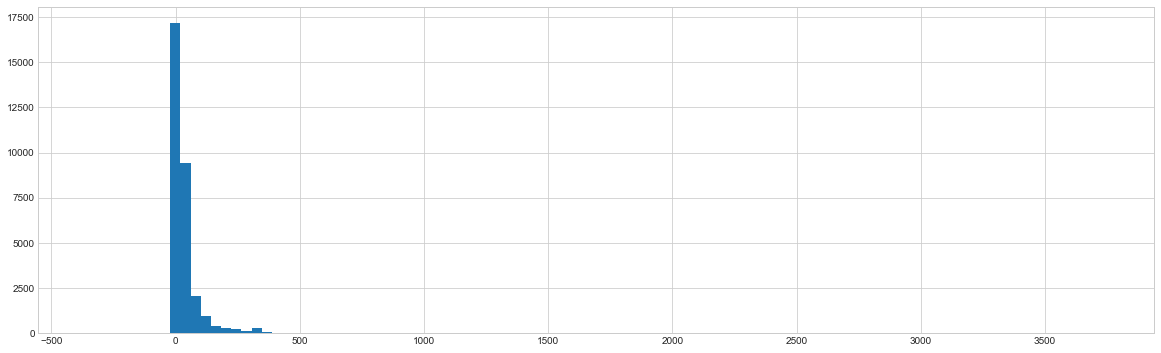

In [9]:
# Analyzing number of days between declaration and inspection

# Histogram
print('==================DESCRIBE==================')
print(df['DATE_DIFF'].describe().round())
print('')
print('==================DESCRIBE_without_NAN==================')
print(df['DATE_DIFF'].describe().round().dropna())
print('')
print('median: '+str(np.median(df['DATE_DIFF'].round().dropna())))


#Ref.: https://stackoverflow.com/questions/20656663/matplotlib-pandas-error-using-histogram
plt.figure(figsize=(20,6))
plt.hist(df['DATE_DIFF'].dropna(), bins=100) # drop nan
print('==================number_of_days_between_declaration_and_inspection==================')
plt.show()

The mean is more than half of the median, which indicates a strong variability in the number of days between the declaration date and the inspection date.

## One Variable (categorical)

### Boroughs

==================BORO_DESC==================
Rosemont–La Petite-Patrie               4094
Mercier–Hochelaga-Maisonneuve           3866
Villeray–Saint-Michel–Parc-Extension    3698
Le Plateau-Mont-Royal                   3519
Ville-Marie                             3174
Name: BORO_NAME, dtype: int64

==================TOP_4==================
First 4 locations represent 49.0 % of total declarations counts



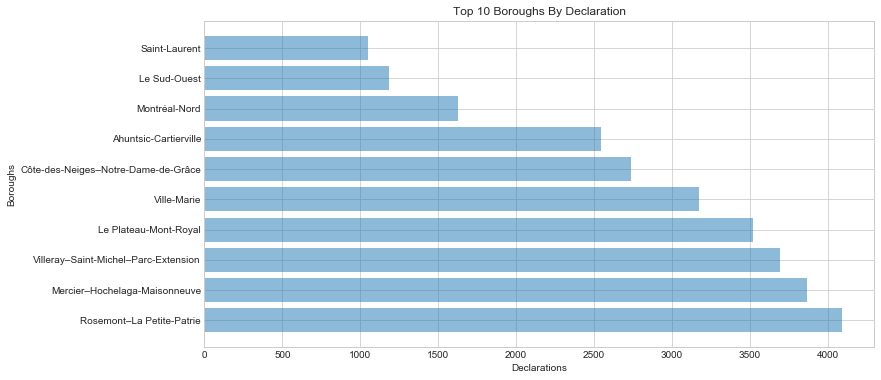

In [10]:
# Ref. : https://pythonspot.com/matplotlib-bar-chart/
# Ref. : https://python-graph-gallery.com/2-horizontal-barplot/

# Analyze by borough distribution with horizontal bar chart
print('==================BORO_DESC==================')
print(df['BORO_NAME'].value_counts().head())
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['BORO_NAME'].value_counts()[1]
             +df['BORO_NAME'].value_counts()[2]
             +df['BORO_NAME'].value_counts()[3])
           /(df['BORO_NAME'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Boroughs By Declaration')

labels = df['BORO_NAME'].value_counts().head(10).index
values = df['BORO_NAME'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.ylabel('Boroughs')
plt.xlabel('Declarations')


plt.show()

In [11]:
# Ref. : https://pythonspot.com/matplotlib-bar-chart/
# Ref. : https://python-graph-gallery.com/2-horizontal-barplot/

# Analyze by borough distribution with horizontal bar chart
print('==================TOP_10_BORO==================')
((df.groupby(['BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))


==================TOP_10_BORO==================


,EXT_QT,DECL_QT
BORO_NAME,,
Rosemont–La Petite-Patrie,6345.00,4094
Mercier–Hochelaga-Maisonneuve,5835.00,3866
Villeray–Saint-Michel–Parc-Extension,5591.00,3698
Le Plateau-Mont-Royal,5513.00,3519
Ville-Marie,4858.00,3174
Côte-des-Neiges–Notre-Dame-de-Grâce,4027.00,2740
Ahuntsic-Cartierville,3567.00,2543
Montréal-Nord,2347.00,1625
Le Sud-Ouest,1650.00,1186


For boroughs orders in descending order based on extermination reports, the order remains unchanged when descending based on the number of declarations.

### Neighborhoods

==================TOP_10_HOOD==================
Sainte-Marie      1671
Crémazie          1125
Maisonneuve       1115
Lorimier           942
Vieux-Rosemont     902
Parc-Extension     834
Est                819
Père-Marquette     769
Cartierville       752
Hochelaga          731
Name: HOOD_NAME, dtype: int64

==================TOP_4==================
First 4 locations represent 23.0 % of total declarations counts



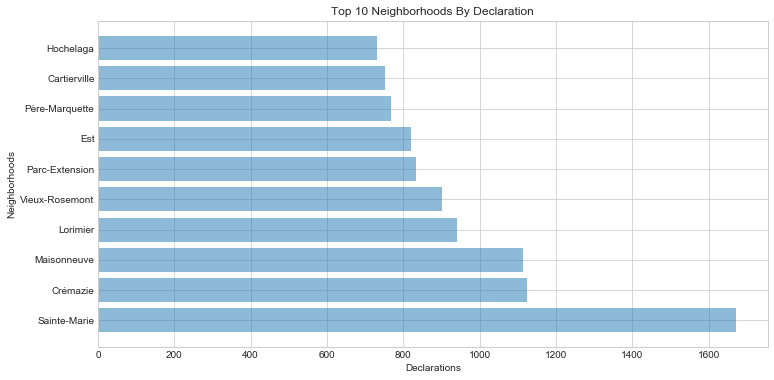

In [12]:
# Analyze Neighborhood distribution
print('==================TOP_10_HOOD==================')
print(df['HOOD_NAME'].value_counts().head(10))
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['HOOD_NAME'].value_counts()[1]
             +df['HOOD_NAME'].value_counts()[2]
             +df['HOOD_NAME'].value_counts()[3])
           /(df['HOOD_NAME'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Neighborhoods By Declaration')

plt.ylabel('Neighborhoods')
plt.xlabel('Declarations')

labels = df['HOOD_NAME'].value_counts().head(10).index
values = df['HOOD_NAME'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()

In [13]:
# Analyze Neighborhood distribution
print('==================TOP_10_HOOD==================')
((df.groupby(['HOOD_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

==================TOP_10_HOOD==================


,EXT_QT,DECL_QT
HOOD_NAME,,
Sainte-Marie,2795.00,1671
Crémazie,1873.00,1125
Maisonneuve,1728.00,1115
Lorimier,1377.00,942
Père-Marquette,1361.00,769
Vieux-Rosemont,1283.00,902
Parc-Extension,1197.00,834
Parc-Laurier,1195.00,652
Est,1169.00,819


The order for neighborhoods is different when descending based based on extermination reports rather than the number of declarations.

When comparing the results between boroughs and neighborhoods, the number of exterminations reports per declaration is more apparent at the neighborhood level. Specifically, it is possible to have more reports for a neighborhood, while having fewer exterminations reports. This is not apparent at the borough level.

### Quantity of Declarations per Month

In [14]:
# Analyze Months distribution from declaration
print('==================DECLARATION_BY_MONTH_DESC==================')
print( (df['DEC_MONTH'].value_counts()).sort_index() )
print('')

df_m_sorted = (df['DEC_MONTH'].value_counts()).sort_index()

==================DECLARATION_BY_MONTH_DESC==================
1     1905
2     2165
3     2089
4     1911
5     1987
6     2360
7     2906
8     3008
9     3417
10    3764
11    3152
12    2577
Name: DEC_MONTH, dtype: int64



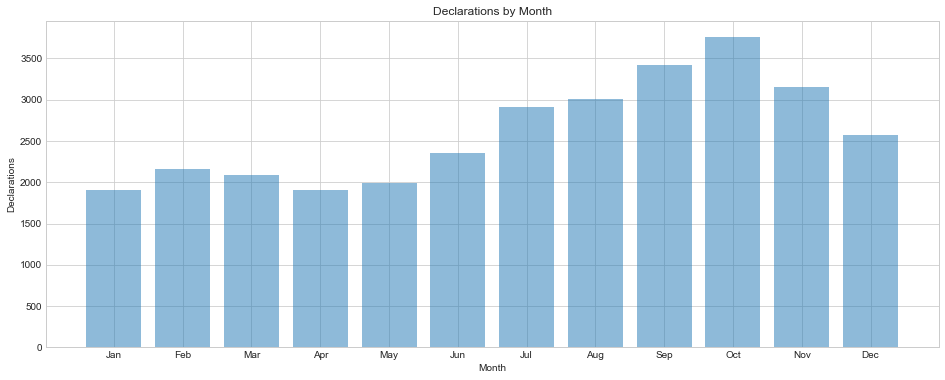

In [15]:
# Bar Chart

plt.figure(figsize=(16,6))
plt.title('Declarations by Month')
plt.xlabel('Month')
plt.ylabel('Declarations')

labels = df_m_sorted.index
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
values = df_m_sorted.values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

### Intersections

==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================
-73.571239_45.584338                     264
-73.659233_45.569024                     181
-73.620588_45.551456                     151
-73.582592_45.49409                      146
-73.58043_45.492816999999995             135
-73.68714399999999_45.518173             132
-73.60591600000001_45.428377000000005    114
-73.563652_45.528809                     113
-73.604952_45.58441                      107
-73.607061_45.58249                       98
Name: LONG_LAT, dtype: int64

==================TOP_4==================
First 4 locations represent 15.0 % of total declarations counts



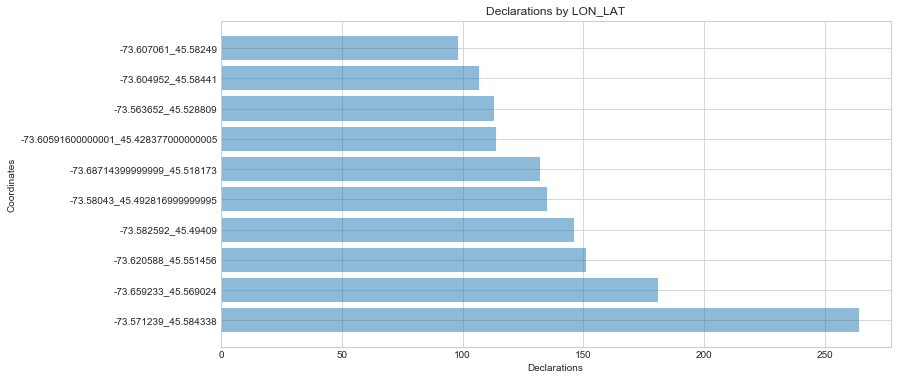

In [16]:
print('==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================')
# Analyze Coordinates distribution from declaration
print(df['LONG_LAT'].value_counts().head(10))
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['LONG_LAT'].value_counts()[1]
             +df['LONG_LAT'].value_counts()[2]
             +df['LONG_LAT'].value_counts()[3])
           /(df['LONG_LAT'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')


# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by LON_LAT')

plt.ylabel('Coordinates')
plt.xlabel('Declarations')

labels = df['LONG_LAT'].value_counts().head(10).index
values = df['LONG_LAT'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()


#### Quantities of extermination reports and declarations

In [17]:
# Ref. : https://stackoverflow.com/questions/37965380/python-pandas-simple-pivot-table-sum-count
    # Ref. : https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# Ref. : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
print('')
print('==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================')
((df.groupby(['LONG_LAT','HOOD_NAME','BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))


==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================


,,,EXT_QT,DECL_QT
LONG_LAT,HOOD_NAME,BORO_NAME,,
-73.571239_45.584338,Grande-Prairie,Saint-Léonard,352.00,264
-73.68714399999999_45.518173,Grenet,Saint-Laurent,295.00,132
-73.630494_45.509854,Parc-Kent,Côte-des-Neiges–Notre-Dame-de-Grâce,208.00,65
-73.659233_45.569024,Sault-au-Récollet,Ahuntsic-Cartierville,193.00,181
-73.585636_45.527404,Parc-Laurier,Le Plateau-Mont-Royal,189.00,79
-73.600298_45.637873,Marc-Aurèle-Fortin,Rivière-des-Prairies–Pointe-aux-Trembles,181.00,76
-73.61954399999999_45.545823999999996,Crémazie,Villeray–Saint-Michel–Parc-Extension,175.00,73
-73.563652_45.528809,Lorimier,Le Plateau-Mont-Royal,161.00,103
-73.53832299999999_45.543811,Hochelaga,Mercier–Hochelaga-Maisonneuve,161.00,60


By going from the neighborhood to the intersection level, the number of extermination reports is more apparent is being independent from the number of declarations.

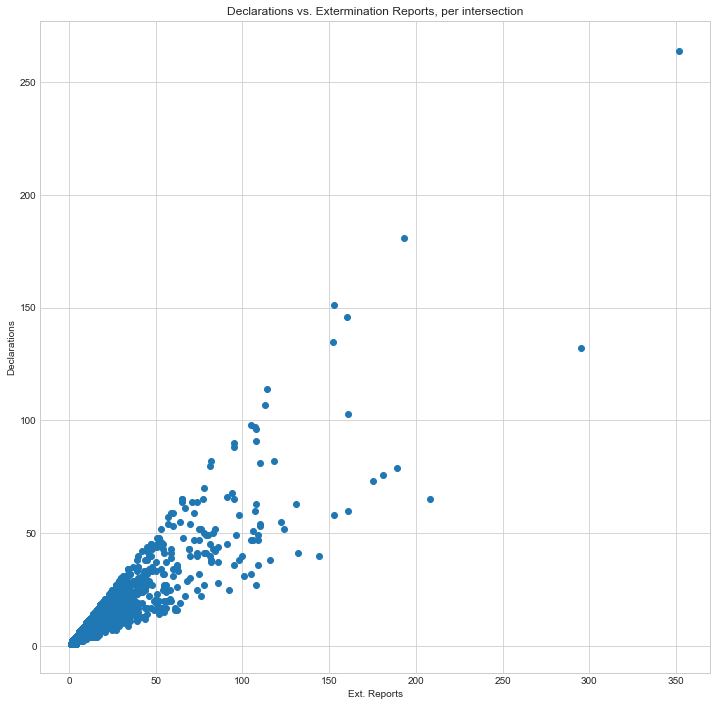

In [18]:
df_coff = ((df.groupby(['LONG_LAT','HOOD_NAME','BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )
# Scatter plot
plt.figure(figsize=(12,12))
plt.title('Declarations vs. Extermination Reports, per intersection')

plt.ylabel('Declarations')
plt.xlabel('Ext. Reports')

plt.plot(df_coff['EXT_QT'], df_coff['DECL_QT'], 'o')
plt.show()

There is a proportional relationship between the number of declarations and the number of extermination reports. Specifically, one report is assumed to be included in one declaration, as a minimum, while up to four reports can be included in a declaration by definition. This two ranges form the diagonals that bound the dataset and form the cone shap in the figure herein.

#### View of Boroughs based on Declaration quantity

In [19]:
# intersections for boroughs
intersection_highest = df['BORO_NAME'].value_counts().head(1).index[0]
intersection_lowest = df['BORO_NAME'].value_counts().tail(1).index[0]

# dataframes
df_intersection_highest = df[df['BORO_NAME'] == intersection_highest]
df_intersection_lowest = df[df['BORO_NAME'] == intersection_lowest]

# modified dataframes
df_highest = ((df_intersection_highest.groupby(['LONG_LAT'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )

df_lowest = ((df_intersection_lowest.groupby(['LONG_LAT'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )

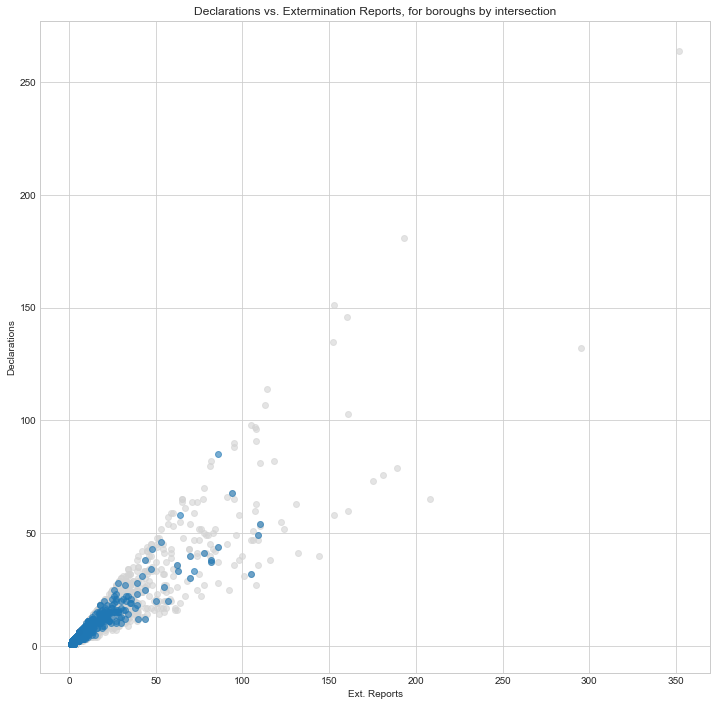

In [20]:
# Scatter plot
plt.figure(figsize=(12,12))
plt.title('Declarations vs. Extermination Reports, for boroughs by intersection')

plt.ylabel('Declarations')
plt.xlabel('Ext. Reports')

plt.plot(df_coff['EXT_QT'], df_coff['DECL_QT'], 'o', color='lightgray', alpha=0.6)

# L'Île-Bizard–Sainte-Geneviève 
plt.plot(df_lowest['EXT_QT'], df_lowest['DECL_QT'], 'o', color='red', alpha=0.8)
# Rosemont–La Petite-Patrie 
plt.plot(df_highest['EXT_QT'], df_highest['DECL_QT'], 'o', alpha=0.6)

plt.show()


In [21]:
df_highest.corr()

,EXT_QT,DECL_QT
EXT_QT,1.00,0.93
DECL_QT,0.93,1.00


The borough, Rosemont–La Petite-Patrie, with the highest declarations quantity has a correlation coefficient of 0.93, with a strong indication of a relationship between the number of declarations and the number of exterminations per declarations.

#### View of Neighborhood based on Neight quantity

In [22]:
# intersections for boroughs
intersection_highest = df['HOOD_NAME'].value_counts().head(1).index[0]
intersection_lowest = df['HOOD_NAME'].value_counts().tail(1).index[0]

# dataframes
df_intersection_highest = df[df['HOOD_NAME'] == intersection_highest]
df_intersection_lowest = df[df['HOOD_NAME'] == intersection_lowest]

# modified dataframes
df_highest = ((df_intersection_highest.groupby(['LONG_LAT'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )

df_lowest = ((df_intersection_lowest.groupby(['LONG_LAT'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )

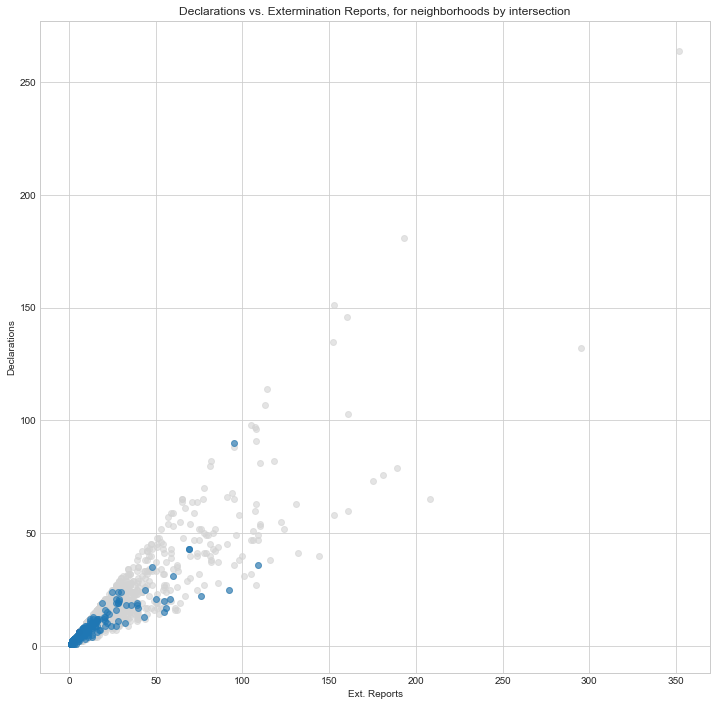

In [23]:
# Scatter plot
plt.figure(figsize=(12,12))
plt.title('Declarations vs. Extermination Reports, for neighborhoods by intersection')

plt.ylabel('Declarations')
plt.xlabel('Ext. Reports')

plt.plot(df_coff['EXT_QT'], df_coff['DECL_QT'], 'o', color='lightgray', alpha=0.6)

# L'Île-Bizard–Sainte-Geneviève 
plt.plot(df_lowest['EXT_QT'], df_lowest['DECL_QT'], 'o', color='red', alpha=0.8)
# Sainte-Marie 
plt.plot(df_highest['EXT_QT'], df_highest['DECL_QT'], 'o', alpha=0.6)

plt.show()

In [24]:
df_highest.corr()

,EXT_QT,DECL_QT
EXT_QT,1.00,0.86
DECL_QT,0.86,1.00


The neighborhood, Sainte-Marie, with the highest declarations quantity has a correlation coefficient of 0.86, with an indication of a relationship between the number of declarations and the number of exterminations per declarations; although, the relationship is not as strong as the borough level.

### Over time trend

In [25]:
df.groupby(['BORO_NAME','DEC_YEAR'])['BORO_NAME'].count().head()

BORO_NAME              DEC_YEAR
Ahuntsic-Cartierville  2011         87
                       2012        140
                       2013        431
                       2014        510
                       2015        435
Name: BORO_NAME, dtype: int64

In [26]:
((df.groupby(['HOOD_NAME','DEC_YEAR'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head())

EXT_QT  DECL_QT
HOOD_NAME    DEC_YEAR                 
Sainte-Marie 2013      904.00      406
Maisonneuve  2013      474.00      244
Crémazie     2013      402.00      184
Sainte-Marie 2014      374.00      226
             2015      355.00      240

#### Borough by month

In [27]:
# pivot table a dataframe

# Ref.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
df.pivot_table(index = 'BORO_NAME', 
               columns = 'DEC_MONTH',
               aggfunc = 
                   {'NO_DECLARATION':'count'},
               fill_value = 0, #verify why there are Nan values
               dropna = True
               )

NO_DECLARATION                      \
DEC_MONTH                                            1    2    3    4    5    
BORO_NAME                                                                     
Ahuntsic-Cartierville                               160  179  156  131  143   
Anjou                                                17   12   26   14   17   
Côte-des-Neiges–Notre-Dame-de-Grâce                 208  220  156  177  182   
L'Île-Bizard–Sainte-Geneviève                         2    0    0    0    2   
LaSalle                                              18   52   22   31   23   
Lachine                                              25   28   28   25   20   
Le Plateau-Mont-Royal                               205  214  219  203  198   
Le Sud-Ouest                                         70  121  163  107   88   
Mercier–Hochelaga-Maisonneuve                       247  239  249  206  228   
Montréal-Nord                                        66  108  105   94   80   
Outremont                                             7   15   18    7    4   
Pierrefonds-Roxboro                                   4    7    3    3    2   
Rivière-des-Prairies–Pointe-aux-Trembles             45   40   56   43   28   
Rosemont–La Petite-Patrie                           230  281  244  264  219   
Saint-Laurent                                        68   59   49   59  304   
Saint-Léonard                                        89   76   43   49   57   
Verdun                                               33   41   57   42   39   
Ville-Marie                                         200  242  217  199  150   
Villeray–Saint-Michel–Parc-Extension                211  231  278  257  203   

                                                                             
DEC_MONTH                                  6    7    8    9    10   11   12  
BORO_NAME                                                                    
Ahuntsic-Cartierville                     157  250  265  309  293  281  219  
Anjou                                      23   28   22   44   33   33   22  
Côte-des-Neiges–Notre-Dame-de-Grâce       192  264  263  258  311  287  222  
L'Île-Bizard–Sainte-Geneviève               0    0    3    2    3    2    1  
LaSalle                                    28   64   69   56   44   57   36  
Lachine                                    19   27   32   37   44   31   29  
Le Plateau-Mont-Royal                     279  327  363  373  473  414  251  
Le Sud-Ouest                              119   65   96   73  107  101   76  
Mercier–Hochelaga-Maisonneuve             305  428  363  426  425  415  335  
Montréal-Nord                             110  155  177  194  212  180  144  
Outremont                                   7   19    8   13   13   10   13  
Pierrefonds-Roxboro                         3   19   17   14   16    8   14  
Rivière-des-Prairies–Pointe-aux-Trembles   86   63   54   51   78   64   60  
Rosemont–La Petite-Patrie                 313  369  407  569  514  357  327  
Saint-Laurent                              55   72   78  107   81   55   60  
Saint-Léonard                              73   88   77   42  141  101  132  
Verdun                                     67   77   77   77   88   75   45  
Ville-Marie                               253  261  259  352  412  356  273  
Villeray–Saint-Michel–Parc-Extension      271  330  378  420  476  325  318

#### Borough by year

In [28]:
# pivot table a dataframe

# Ref.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
df.pivot_table(index = 'BORO_NAME', 
               columns = 'DEC_YEAR',
               aggfunc = 
                   {'EXT_FREQ': sum, 'NO_DECLARATION':'count'},
               fill_value = 0, #verify why there are Nan values
               dropna = True
               )

EXT_FREQ                              \
DEC_YEAR                                     2011 2012  2013  2014  2015 2016   
BORO_NAME                                                                       
Ahuntsic-Cartierville                         126  213   778   675   541  414   
Anjou                                          26   35   123    52    66   46   
Côte-des-Neiges–Notre-Dame-de-Grâce           223  262   427   557   635  856   
L'Île-Bizard–Sainte-Geneviève                   2    0     2     4     8    1   
LaSalle                                        32   54    50    63   114   91   
Lachine                                        28   60    87    55    56   29   
Le Plateau-Mont-Royal                         254  418  1070   824   746  793   
Le Sud-Ouest                                   62  255   452   198   218  212   
Mercier–Hochelaga-Maisonneuve                 315  523  1489   744   810  715   
Montréal-Nord                                 127  251   388   317   346  325   
Outremont                                       3   14    21    35    52   50   
Pierrefonds-Roxboro                            16    9    15    19    23   28   
Rivière-des-Prairies–Pointe-aux-Trembles       26   58   264   124   142  107   
Rosemont–La Petite-Patrie                     322  410  1214  1023  1094  792   
Saint-Laurent                                  53   75   167   364   400   78   
Saint-Léonard                                  30  119   350   265   173   96   
Verdun                                         61  126   165   121   161   92   
Ville-Marie                                   239  375  1294   738   773  554   
Villeray–Saint-Michel–Parc-Extension          250  408  1107   959   788  701   

                                                   NO_DECLARATION            \
DEC_YEAR                                 2017 2018           2011 2012 2013   
BORO_NAME                                                                     
Ahuntsic-Cartierville                     462  358             87  140  431   
Anjou                                      66   36             22   25   52   
Côte-des-Neiges–Notre-Dame-de-Grâce       597  470            176  186  323   
L'Île-Bizard–Sainte-Geneviève               0    0              2    0    2   
LaSalle                                   179  127             31   40   36   
Lachine                                   117  110             22   37   51   
Le Plateau-Mont-Royal                     696  712            207  289  577   
Le Sud-Ouest                              109  144             56  127  344   
Mercier–Hochelaga-Maisonneuve             555  684            232  392  758   
Montréal-Nord                             350  243             92  163  258   
Outremont                                  17   13              3   11   15   
Pierrefonds-Roxboro                        32   23             13    7   11   
Rivière-des-Prairies–Pointe-aux-Trembles  123  170             20   40  118   
Rosemont–La Petite-Patrie                 815  675            240  311  645   
Saint-Laurent                             423   77             41   59  120   
Saint-Léonard                             146  101             28  111  285   
Verdun                                     97  145             52   77  123   
Ville-Marie                               361  524            191  270  643   
Villeray–Saint-Michel–Parc-Extension      786  592            179  282  556   

                                                                   
DEC_YEAR                                 2014 2015 2016 2017 2018  
BORO_NAME                                                          
Ahuntsic-Cartierville                     510  435  308  355  277  
Anjou                                      37   42   35   47   31  
Côte-des-Neiges–Notre-Dame-de-Grâce       405  461  527  340  322  
L'Île-Bizard–Sainte-Geneviève               4    6    1    0    0  
LaSalle                                    

# Business Perspective

## Data Persepective

## One Variable

### Categorical

There are a few categorical values that we can generate utilizing our data.  This would be counts based on neighborhood (NOM_QR), borough (NOM_ARROND), declaration date (DATE_DECLARATION) and intersection location (COORD_X x COORD_Y) for longitude and latitude.  This would give us different insights on the infestations declared in the various areas of the city. 

### Numerical

Based on the categorical values we generated above, we can then establish Min, Max, Mean values based on those Counts.  We can also generate Sums based on the number of visits by location or by time of year (based on declaration dates) to possibly gain insight on variables such as temperature or moving period (seasonal). 

## Multiple Variables

Multi variable statistics can also be generated based on our dataset to try and establish trends and gain further insight. Examples of such include:

-	Counts on borough (NOM_ARROND) and neighborhood (NOM_QR) by date of declaration
-	Number of days between DATE_INSP_VISPRE and DATE_DECLARATION. 
(Long waiting period can cause infestations to spread.)
-	Number of days between DATE_DECLARATION - DATE_DEBUTTRAIT
-	(Long waiting period can cause infestations to spread.)


# Business Persepective

### Descriptive Data Analysis

■ Descriptive Analytics

What happened? We know that there were exterminations at this location (intersection) in the past, sometimes frequently.


The number of extermination and declaration is not limited to a single borough and neighborhood. Three of the boroughs with the highest count of declarations are in promimity of each other. Although, the intersection (-73.571239_45.584338) with highest extermination reports and declaration count is not in the top borough and is not in the top neighborhood. It may be an outlier and further investigation is required.

■ Descriptive Analytics

What happened? We know that there were exterminations at this location (intersection) in the past, sometimes frequently.

The top intersection are not in the same neighborhood. Relative proximity between the intersections is not yet calculated, in order to distinguish proximity from being part of neighborhood or borough.

### Diagnostic Data Analysis

Bedbugs can spread and infest an area in numerous ways.  Based on government reports we know infestations can spread by human contact (clothing), unsanitary environments, along with used furniture and mattresses to name a few.  This exercise in data mining has been undertaken to potentially uncover flash points, periods and/or locations that can possibly bring to light problematic scenarios that we can rectify and decrease, if not eliminate, future infestations.

#1 Number of days between Inspection/Declaration and Start-End of extermination.  
(Given a lengthy waiting period we could have a potential opportunity for spreading)  

In [29]:
(df['DATE_DECLARATION'] - df['DATE_PRIOR_INSP']).describe()

count                      31241
mean     36 days 19:03:01.261803
std      78 days 05:02:23.472064
min          -348 days +00:00:00
25%              6 days 00:00:00
50%             15 days 00:00:00
75%             39 days 00:00:00
max           3737 days 00:00:00
dtype: object

The lead time between the Declaration and Inspection dates is 6-15 days.

#2 Identify the most problematic boroughs
(What is the difference between worst and best ranked)

In [30]:
print('==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================')
((df.groupby(['LONG_LAT','HOOD_NAME','BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================


,,,EXT_QT,DECL_QT
LONG_LAT,HOOD_NAME,BORO_NAME,,
-73.571239_45.584338,Grande-Prairie,Saint-Léonard,352.00,264
-73.68714399999999_45.518173,Grenet,Saint-Laurent,295.00,132
-73.630494_45.509854,Parc-Kent,Côte-des-Neiges–Notre-Dame-de-Grâce,208.00,65
-73.659233_45.569024,Sault-au-Récollet,Ahuntsic-Cartierville,193.00,181
-73.585636_45.527404,Parc-Laurier,Le Plateau-Mont-Royal,189.00,79
-73.600298_45.637873,Marc-Aurèle-Fortin,Rivière-des-Prairies–Pointe-aux-Trembles,181.00,76
-73.61954399999999_45.545823999999996,Crémazie,Villeray–Saint-Michel–Parc-Extension,175.00,73
-73.563652_45.528809,Lorimier,Le Plateau-Mont-Royal,161.00,103
-73.53832299999999_45.543811,Hochelaga,Mercier–Hochelaga-Maisonneuve,161.00,60


#3 Identify the most problematic neighborhood
(What is the difference between worst and best ranked)

In [31]:
print('==================TOP_10_BORO==================')
print((df.groupby(['BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

print('')
print('==================TOP_10_HOOD==================')
print((df.groupby(['BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

==================TOP_10_BORO==================
                                      EXT_QT  DECL_QT
BORO_NAME                                            
Rosemont–La Petite-Patrie            6345.00     4094
Mercier–Hochelaga-Maisonneuve        5835.00     3866
Villeray–Saint-Michel–Parc-Extension 5591.00     3698
Le Plateau-Mont-Royal                5513.00     3519
Ville-Marie                          4858.00     3174
Côte-des-Neiges–Notre-Dame-de-Grâce  4027.00     2740
Ahuntsic-Cartierville                3567.00     2543
Montréal-Nord                        2347.00     1625
Le Sud-Ouest                         1650.00     1186
Saint-Laurent                        1637.00     1047

==================TOP_10_HOOD==================
                                      EXT_QT  DECL_QT
BORO_NAME                                            
Rosemont–La Petite-Patrie            6345.00     4094
Mercier–Hochelaga-Maisonneuve        5835.00     3866
Villeray–Saint-Michel–Parc-Extension 55

#4 Based on 2 and 3, is the issue borough wide or at neighborhood level? 
(Management issue)

It is neither borough nor neighborhood specific, but rather specific to an intersection.

#5 When was the declaration made?
(Is the problem based on a specific time of year? Heat? Moving period?)

The quantity of declarations rise from June to October, then fall to December. The rest of the year, from January to May, there is no relative change in the declarations month to month.

#6 Is a problem more relevant to a particular block?
(COORD_X x COORD_Y)

-73.571239_45.584338

#7 Nbr_Exterminations x COORD_X x COORD_Y x Nom_QR
(Can the issue be subject to extermination mismanagement?) 

-73.571239_45.584338 	Grande-Prairie 	Saint-Léonard